In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [14]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [16]:
last_twelve_months = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months

datetime.datetime(2016, 8, 23, 0, 0)

In [15]:
measurements = session.query(Measurement)
for measurement in measurements:
    print(measurement.date)

2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-30
2010-01-31
2010-02-01
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-28
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01
2010-04-02
2010-04-03
2010-04-04
2010-04-05
2010-04-06
2010-04-08
2010-04-09
2010-04-10
2010-04-11
2010-04-12
2010-04-13
2010-04-15

2016-06-10
2016-06-11
2016-06-12
2016-06-13
2016-06-14
2016-06-15
2016-06-16
2016-06-17
2016-06-18
2016-06-19
2016-06-20
2016-06-21
2016-06-22
2016-06-23
2016-06-24
2016-06-25
2016-06-26
2016-06-27
2016-06-28
2016-06-29
2016-06-30
2016-07-01
2016-07-02
2016-07-03
2016-07-04
2016-07-05
2016-07-06
2016-07-07
2016-07-08
2016-07-09
2016-07-10
2016-07-11
2016-07-12
2016-07-13
2016-07-14
2016-07-15
2016-07-16
2016-07-17
2016-07-18
2016-07-19
2016-07-20
2016-07-21
2016-07-22
2016-07-23
2016-07-24
2016-07-25
2016-07-26
2016-07-27
2016-07-28
2016-07-29
2016-07-30
2016-07-31
2016-08-01
2016-08-02
2016-08-03
2016-08-04
2016-08-05
2016-08-06
2016-08-07
2016-08-08
2016-08-09
2016-08-10
2016-08-11
2016-08-12
2016-08-13
2016-08-14
2016-08-15
2016-08-16
2016-08-17
2016-08-18
2016-08-19
2016-08-20
2016-08-21
2016-08-22
2016-08-23
2016-08-24
2016-08-25
2016-08-26
2016-08-27
2016-08-28
2016-08-29
2016-08-30
2016-08-31
2016-09-01
2016-09-02
2016-09-03
2016-09-04
2016-09-05
2016-09-06
2016-09-07
2016-09-08

2014-05-11
2014-05-12
2014-05-13
2014-05-14
2014-05-15
2014-05-16
2014-05-17
2014-05-18
2014-05-19
2014-05-20
2014-05-21
2014-05-22
2014-05-23
2014-05-24
2014-05-25
2014-05-26
2014-05-27
2014-05-28
2014-05-29
2014-05-30
2014-05-31
2014-06-01
2014-06-02
2014-06-03
2014-06-04
2014-06-05
2014-06-06
2014-06-07
2014-06-08
2014-06-09
2014-06-10
2014-06-11
2014-06-12
2014-06-13
2014-06-14
2014-06-15
2014-06-16
2014-06-17
2014-06-18
2014-06-19
2014-06-20
2014-06-21
2014-06-22
2014-06-23
2014-06-24
2014-06-25
2014-06-26
2014-06-27
2014-06-28
2014-06-29
2014-06-30
2014-07-01
2014-07-02
2014-07-03
2014-07-04
2014-07-05
2014-07-06
2014-07-07
2014-07-08
2014-07-09
2014-07-10
2014-07-11
2014-07-12
2014-07-13
2014-07-14
2014-07-15
2014-07-16
2014-07-17
2014-07-18
2014-07-19
2014-07-20
2014-07-21
2014-07-22
2014-07-23
2014-07-24
2014-07-25
2014-07-26
2014-07-27
2014-07-28
2014-07-29
2014-07-30
2014-07-31
2014-08-01
2014-08-02
2014-08-03
2014-08-04
2014-08-05
2014-08-06
2014-08-07
2014-08-08
2014-08-09

2013-02-05
2013-02-06
2013-02-07
2013-02-08
2013-02-11
2013-02-12
2013-02-13
2013-02-14
2013-02-15
2013-02-16
2013-02-18
2013-02-19
2013-02-20
2013-02-21
2013-02-22
2013-02-23
2013-02-25
2013-02-26
2013-02-27
2013-02-28
2013-03-01
2013-03-02
2013-03-04
2013-03-05
2013-03-06
2013-03-07
2013-03-08
2013-03-10
2013-03-11
2013-03-12
2013-03-13
2013-03-14
2013-03-19
2013-03-20
2013-03-21
2013-03-28
2013-03-29
2013-04-01
2013-04-02
2013-04-03
2013-04-04
2013-04-07
2013-04-08
2013-04-09
2013-04-10
2013-04-11
2013-04-12
2013-04-13
2013-04-14
2013-04-15
2013-04-16
2013-04-17
2013-04-18
2013-04-19
2013-04-20
2013-04-22
2013-04-23
2013-04-24
2013-04-25
2013-04-26
2013-04-29
2013-04-30
2013-05-01
2013-05-02
2013-05-03
2013-05-05
2013-05-06
2013-05-07
2013-05-08
2013-05-09
2013-05-10
2013-05-12
2013-05-13
2013-05-14
2013-05-15
2013-05-16
2013-05-17
2013-05-20
2013-05-21
2013-05-22
2013-05-23
2013-05-24
2013-05-25
2013-05-27
2013-05-28
2013-05-29
2013-05-30
2013-05-31
2013-06-03
2013-06-04
2013-06-05

2014-09-08
2014-09-09
2014-09-10
2014-09-11
2014-09-12
2014-09-15
2014-09-16
2014-09-17
2014-09-18
2014-09-19
2014-09-22
2014-09-23
2014-09-24
2014-09-25
2014-09-26
2014-09-29
2014-09-30
2014-10-01
2014-10-02
2014-10-03
2014-10-04
2014-10-05
2014-10-10
2014-10-13
2014-10-14
2014-10-15
2014-10-16
2014-10-17
2014-10-20
2014-10-21
2014-10-22
2014-10-23
2014-10-24
2014-10-27
2014-11-12
2014-11-13
2014-11-14
2014-11-17
2014-11-18
2014-11-19
2014-11-20
2014-11-21
2014-12-01
2014-12-02
2014-12-03
2014-12-04
2014-12-05
2014-12-08
2014-12-09
2014-12-10
2014-12-11
2014-12-15
2014-12-16
2014-12-17
2014-12-18
2014-12-19
2014-12-22
2014-12-23
2014-12-24
2014-12-26
2014-12-29
2014-12-30
2015-01-02
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-12
2015-01-13
2015-01-14
2015-01-15
2015-01-16
2015-01-20
2015-01-21
2015-01-22
2015-01-23
2015-01-26
2015-01-27
2015-01-28
2015-01-29
2015-01-30
2015-02-02
2015-02-03
2015-02-04
2015-02-05
2015-02-06
2015-02-09
2015-02-10
2015-02-11
2015-02-12

2012-02-15
2012-02-16
2012-02-17
2012-02-18
2012-02-19
2012-02-20
2012-02-21
2012-02-22
2012-02-23
2012-02-24
2012-02-25
2012-02-26
2012-02-27
2012-02-28
2012-02-29
2012-03-01
2012-03-02
2012-03-03
2012-03-04
2012-03-05
2012-03-06
2012-03-07
2012-03-08
2012-03-09
2012-03-10
2012-03-11
2012-03-12
2012-03-13
2012-03-14
2012-03-15
2012-03-16
2012-03-17
2012-03-18
2012-03-19
2012-03-20
2012-03-21
2012-03-22
2012-03-23
2012-03-24
2012-03-25
2012-03-26
2012-03-27
2012-03-28
2012-03-29
2012-03-30
2012-03-31
2012-04-01
2012-04-02
2012-04-03
2012-04-04
2012-04-05
2012-04-06
2012-04-07
2012-04-08
2012-04-09
2012-04-10
2012-04-11
2012-04-12
2012-04-13
2012-04-14
2012-04-15
2012-04-16
2012-04-17
2012-04-18
2012-04-19
2012-04-20
2012-04-21
2012-04-22
2012-04-23
2012-04-24
2012-04-25
2012-04-26
2012-04-27
2012-04-28
2012-04-29
2012-04-30
2012-05-01
2012-05-02
2012-05-03
2012-05-04
2012-05-05
2012-05-06
2012-05-07
2012-05-08
2012-05-09
2012-05-10
2012-05-11
2012-05-12
2012-05-13
2012-05-14
2012-05-15

2011-08-28
2011-08-29
2011-08-30
2011-08-31
2011-09-01
2011-09-02
2011-09-03
2011-09-04
2011-09-05
2011-09-06
2011-09-07
2011-09-08
2011-09-09
2011-09-10
2011-09-11
2011-09-12
2011-09-13
2011-09-14
2011-09-15
2011-09-16
2011-09-17
2011-09-18
2011-09-19
2011-09-20
2011-09-21
2011-09-22
2011-09-23
2011-09-24
2011-09-25
2011-09-26
2011-09-27
2011-09-28
2011-09-29
2011-09-30
2011-10-01
2011-10-02
2011-10-03
2011-10-04
2011-10-05
2011-10-06
2011-10-07
2011-10-08
2011-10-09
2011-10-10
2011-10-11
2011-10-12
2011-10-13
2011-10-14
2011-10-15
2011-10-16
2011-10-17
2011-10-18
2011-10-19
2011-10-20
2011-10-21
2011-10-22
2011-10-23
2011-10-24
2011-10-25
2011-10-26
2011-10-27
2011-10-28
2011-10-29
2011-10-30
2011-10-31
2011-11-01
2011-11-02
2011-11-03
2011-11-04
2011-11-05
2011-11-06
2011-11-07
2011-11-08
2011-11-09
2011-11-10
2011-11-11
2011-11-12
2011-11-13
2011-11-14
2011-11-15
2011-11-16
2011-11-17
2011-11-18
2011-11-19
2011-11-20
2011-11-21
2011-11-22
2011-11-23
2011-11-24
2011-11-25
2011-11-26

2010-12-06
2010-12-07
2010-12-08
2010-12-09
2010-12-10
2010-12-11
2010-12-12
2010-12-13
2010-12-14
2010-12-15
2010-12-16
2010-12-17
2010-12-18
2010-12-19
2010-12-20
2010-12-21
2010-12-22
2010-12-23
2010-12-24
2010-12-25
2010-12-26
2010-12-27
2010-12-28
2010-12-29
2010-12-30
2010-12-31
2011-01-01
2011-01-02
2011-01-03
2011-01-04
2011-01-05
2011-01-07
2011-01-08
2011-01-09
2011-01-10
2011-01-11
2011-01-12
2011-01-13
2011-01-14
2011-01-16
2011-01-17
2011-01-18
2011-01-19
2011-01-20
2011-01-21
2011-01-22
2011-01-23
2011-01-24
2011-01-25
2011-01-26
2011-01-27
2011-01-28
2011-01-29
2011-01-30
2011-01-31
2011-02-01
2011-02-02
2011-02-03
2011-02-04
2011-02-05
2011-02-06
2011-02-07
2011-02-08
2011-02-09
2011-02-10
2011-02-11
2011-02-12
2011-02-13
2011-02-14
2011-02-15
2011-02-16
2011-02-17
2011-02-18
2011-02-19
2011-02-20
2011-02-21
2011-02-22
2011-02-23
2011-02-24
2011-02-25
2011-02-26
2011-02-27
2011-02-28
2011-03-01
2011-03-02
2011-03-03
2011-03-04
2011-03-06
2011-03-07
2011-03-08
2011-03-09

2012-06-03
2012-06-04
2012-06-05
2012-06-06
2012-06-07
2012-06-08
2012-06-09
2012-06-10
2012-06-11
2012-06-12
2012-06-13
2012-06-14
2012-06-15
2012-06-16
2012-06-17
2012-06-18
2012-06-19
2012-06-20
2012-06-21
2012-06-23
2012-06-24
2012-06-25
2012-06-26
2012-06-27
2012-06-28
2012-06-29
2012-07-01
2012-07-02
2012-07-03
2012-07-04
2012-07-05
2012-07-06
2012-07-07
2012-07-08
2012-07-09
2012-07-10
2012-07-11
2012-07-12
2012-07-13
2012-07-14
2012-07-15
2012-07-16
2012-07-17
2012-07-18
2012-07-19
2012-07-20
2012-07-21
2012-07-22
2012-07-23
2012-07-24
2012-07-25
2012-07-26
2012-07-27
2012-07-28
2012-07-29
2012-07-30
2012-07-31
2012-08-01
2012-08-02
2012-08-03
2012-08-04
2012-08-05
2012-08-06
2012-08-07
2012-08-08
2012-08-09
2012-08-10
2012-08-11
2012-08-12
2012-08-13
2012-08-14
2012-08-15
2012-08-16
2012-08-17
2012-08-19
2012-08-20
2012-08-21
2012-08-22
2012-08-23
2012-08-24
2012-08-25
2012-08-27
2012-08-28
2012-08-29
2012-08-30
2012-08-31
2012-09-01
2012-09-02
2012-09-03
2012-09-04
2012-09-05

In [22]:
p_results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_twelve_months).\
                    group_by(Measurement.date).all()
p_results

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [23]:
precipitation_df = pd.DataFrame(p_results, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)
precipitation_df.head()

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


<function matplotlib.pyplot.show(*args, **kw)>

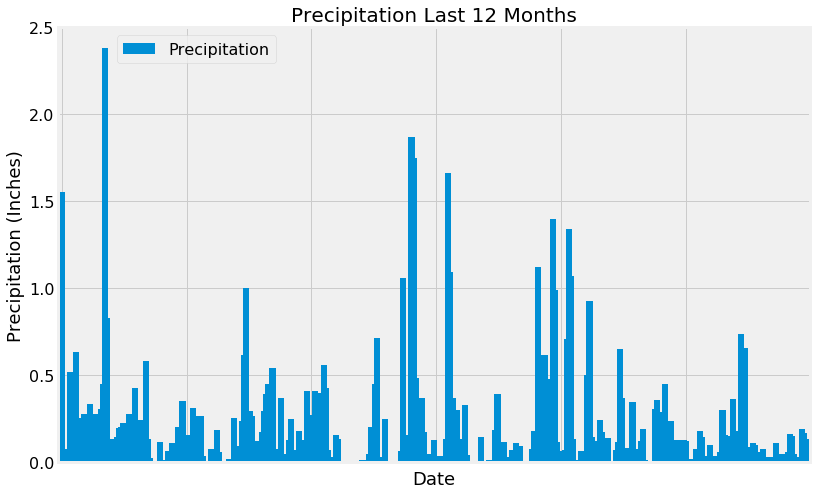

In [26]:
ax = precipitation_df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.show

In [27]:
precipitation_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [28]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
s_results = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
s_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
best_station = s_results[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == best_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

t_results = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == best_station).\
                filter(Measurement.date >= last_twelve_months).all()
tobs_df = pd.DataFrame(t_results)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


<function matplotlib.pyplot.show(*args, **kw)>

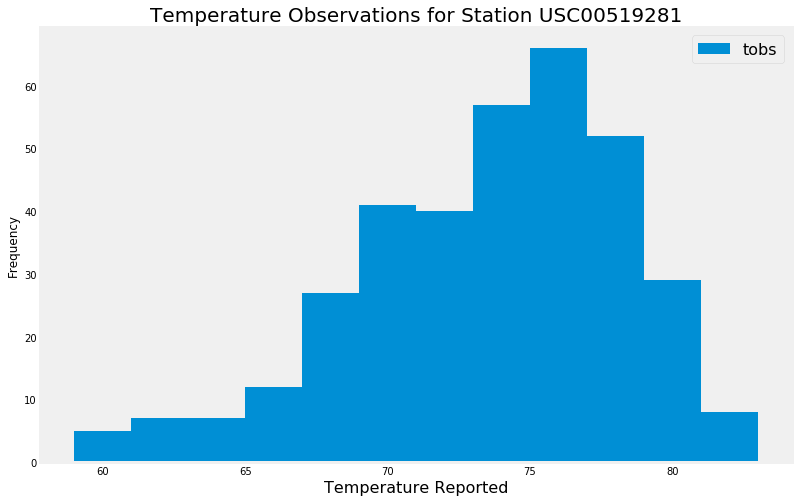

In [34]:
tobs_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title("Temperature Observations for Station " + best_station, fontsize=20)
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.show

![precipitation](Images/station-histogram.png)

In [41]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-01-01', '2017-01-01'))

[(56.0, 74.1317494600432, 84.0)]


In [42]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_results = calc_temps('2016-01-01', '2017-01-01')
trip_results

[(56.0, 74.1317494600432, 84.0)]

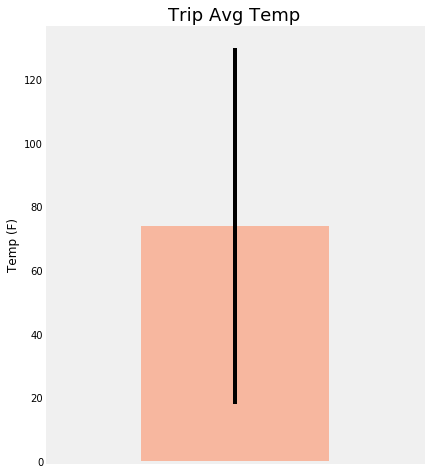

In [44]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(trip_results, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] = trip_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=18)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.show()